# Sound Classification using ML.Net

<img src="assets\spectrogram-violin.png" alt="Spectrogram" style="zoom:80%;" />

## Introduction

Ever wondered how a Machine Learning algorithm identifies and classifies a sound? In this session, I'll start with the basics of sound, followed by its working using Machine Learning. We'll explore different ways of sound classification using ML.Net.

## Basics of Sound

- **Sound** : A pressure wave created by a vibrating object.
- **Amplitude** : Measure of height of a wave or loudness
- **Frequency** : Total # of waves produced per second. Human(20Hz – 20KHz)
- **SampleRate** : How many times per second a sound is sampled. 44.1KHz, 96KHz
- **BitRate** :  Amount of data transferred into audio. 8-bit, 16-bit, 24-bit.
- **Channels** : Represents spatial experience of sound. Mono/Stereo/Surround
- **FFT(Fast Fourier Transform)** : A formula to convert a signal from time to frequency domain

## Internal of Sound Classification

### Visual representation of audio file

<img src="assets\different-audio-representation.png" alt="Spectrogram" style="zoom:80%;" />

#### Classification workflow

<img src="assets\audio-classification-flow.png" alt="Spectrogram" style="zoom:120%;" />

## Pre-checks

In [1]:
#!about

The below script needs to be able to find the current output cell; this is an easy method to get it.

.NET Interactive© 2020 Microsoft CorporationVersion: 1.0.350406+612aa40cba7d6a1f734272f71657a65561394752Library version: 1.0.0-beta.22504.6+612aa40cba7d6a1f734272f71657a65561394752Build date: 2022-10-19T10:27:53.4338438Zhttps://github.com/dotnet/interactive


## Exploratory Data Analysis

### Dataset

Name: GTZAN Dataset - Music Genre Classification
Source: https://www.kaggle.com/datasets/andradaolteanu/gtzan-dataset-music-genre-classification?resource=download

Dataset content
- genres original folder
- images original folder
- features30seconds.csv file
- features3seconds.csv file

<img src="assets\dataset-structure.png" alt="Dataset Structure" style="zoom:80%;margin:auto;">

### Define Application wide Items

#### Nuget Packages

In [ ]:
// ML.NET 
#r "nuget:Microsoft.ML,1.4.0"
#r "nuget:Microsoft.ML.Vision,1.4.0"
#r "nuget:Microsoft.ML.ImageAnalytics,1.4.0"
#r "nuget:Microsoft.Data.Analysis"
#r "nuget:SciSharp.TensorFlow.Redist,1.14.0"

// Utility
#r "nuget:Spectrogram"
#r "nuget:System.Windows.Extensions"

Installed Packages Microsoft.Data.Analysis, 0.21.1 Microsoft.ML, 1.4.0 Microsoft.ML.ImageAnalytics, 1.4.0 Microsoft.ML.Vision, 1.4.0 SciSharp.TensorFlow.Redist, 1.14.0 Spectrogram, 1.6.1 System.Windows.Extensions, 8.0.0

Loading extensions from `Microsoft.Data.Analysis.Interactive.dll`

Failed to load kernel extension "DataFrameKernelExtension" from assembly C:\Users\praghuvanshi\.nuget\packages\microsoft.data.analysis\0.21.1\interactive-extensions\dotnet\Microsoft.Data.Analysis.Interactive.dll

In [3]:
// Latest version(2.1.0) of NAudio doesn't work with dotnet interactive.(https://github.com/naudio/NAudio/issues/752)
#r "nuget: NAudio, 1.9.0"

Installed Packages NAudio, 1.9.0

### Namespaces

In [4]:
using Microsoft.ML;
using Microsoft.ML.Data;
using Microsoft.ML.Transforms;
using Microsoft.ML.Vision;
using Microsoft.AspNetCore.Html;
using Microsoft.DotNet.Interactive.Formatting;
using static Microsoft.DotNet.Interactive.Formatting.PocketViewTags;

using System.IO;
using System.Net;
using Spectrogram;
using System.Drawing;
using System.Drawing.Imaging;
using System.Media;
using System.Threading;

### Constants and Variables

In [5]:
// Constants
private string MODEL_INPUT_NAME = "modelInput";
private string MODEL_OUTPUT_NAME = "modelOutput";
private string MODEL_FILE_NAME = "SoundClassifier.zip";
private string ONNX_MODEL_FILE_NAME = "SoundClassifier.onnx";
private string AUDIO_FILE_EXTENSION = ".wav";
private string IMAGE_FILE_EXTENSION = ".png";
private int IMAGE_WIDTH = 288;
private int IMAGE_HEIGHT = 432;
private int FFT_SIZE = 8192;
private int STEP_SIZE = 200;
private int MAX_FREQUENCY = 3000;
private int MEL_BIN_COUNT = 250;

// Dataset
var CurrentWorkingDirectory = Directory.GetCurrentDirectory();
var DatasetPath = Path.Combine(CurrentWorkingDirectory, "gtzan-dataset-music-genre-classification", "Data");
var AudioFilePath = Path.Combine(DatasetPath, "genres_original");
var AudioImagesFilePath = Path.Combine(DatasetPath, "images_original");
var AudioImagesFilePathAll = Path.Combine(DatasetPath, "images_original_all");

var TrainAudioImagesFilePath = Path.Combine(AudioImagesFilePath, "train");
var TestAudioImagesFilePath = Path.Combine(AudioImagesFilePath, "test");
var ValAudioImagesFilePath = Path.Combine(AudioImagesFilePath, "val");

var JazzDirectoryPath = Path.Combine(AudioFilePath, "jazz");
var SampleAudioFilePath = Path.Combine(JazzDirectoryPath, "jazz.00002.wav");

var Features3SecondsPath = Path.Combine(DatasetPath, "features_3_sec.csv");

var ModelPath = Path.Combine(CurrentWorkingDirectory, "assets", MODEL_FILE_NAME);


display(SampleAudioFilePath)

C:\Praveen\sourcecontrol\github\praveenraghuvanshi\tech-sessions\11052024-Sound-Classification-ML.Net-dotnetblr\gtzan-dataset-music-genre-classification\Data\genres_original\jazz\jazz.00002.wav

### Utility Functions

#### Formatter

By default the output of DataFrame is not proper and in order to display it as a table, we need to have a custom formatter implemented as shown in next cell.

In [6]:
// Formats the table
Formatter.Register(typeof(Microsoft.Data.Analysis.DataFrame),(dataFrame, writer) =>
{
    var df = dataFrame as Microsoft.Data.Analysis.DataFrame;
    var headers = new List<IHtmlContent>();
    headers.Add(th(i("index")));
    headers.AddRange(df.Columns.Select(c => (IHtmlContent)th(c.Name)));
    var rows = new List<List<IHtmlContent>>();
    var take = 10;
    for (var i = 0; i < Math.Min(take, df.Rows.Count); i++)
    {
        var cells = new List<IHtmlContent>();
        cells.Add(td(i));
        foreach (var obj in df.Rows[i])
        {
            cells.Add(td(obj));
        }
        rows.Add(cells);
    }

    var t = table(
        thead(
            headers),
        tbody(
            rows.Select(
                r => tr(r))));

    writer.Write(t);
}, "text/html");

#### Play Audio

In [7]:
public void PlayAudio(string file)
{
    // Windows OS Specific
    SoundPlayer player = new SoundPlayer(file);
    player.Play();
    
    Thread.Sleep(5000);
    
    player.Stop();
}

#### Display Image

In [8]:
public void DisplayImage(string file)
{
    var data = File.ReadAllBytes(file);
    // Convert so we can display it as HTML
    var b64 = Convert.ToBase64String(data);
    display(HTML($"<img src=\"data:image/png;base64,{b64}\"></img>")); // last call without ; gets displayed
}


warning CS1701: Assuming assembly reference 'Microsoft.AspNetCore.Html.Abstractions, Version=2.2.0.0, Culture=neutral, PublicKeyToken=adb9793829ddae60' used by 'Microsoft.DotNet.Interactive' matches identity 'Microsoft.AspNetCore.Html.Abstractions, Version=6.0.0.0, Culture=neutral, PublicKeyToken=adb9793829ddae60' of 'Microsoft.AspNetCore.Html.Abstractions', you may need to supply runtime policy



#### Plot Spectrogram

In [9]:
public void PlotSpectrogram(int sampleRate, IEnumerable<double> audio, string saveFilePath)
{
    var sg = new SpectrogramGenerator(sampleRate, fftSize: FFT_SIZE, stepSize: STEP_SIZE, maxFreq: MAX_FREQUENCY);
    sg.Add(audio);
    sg.Colormap = Colormap.Viridis;
    sg.SaveImage(saveFilePath);
}

#### Plot Mel-Spectrogram

There is an issue with creating Mel-Spectrogram image using Spectrogram.Net library. It works on windows only as it uses Windows class System.Drawing.Bitmap. This doesn't work with dotnet interactive. So, I'll skip this step from notebook, however below code can be easily executed in Visual Studio and it's available at the visual studio solution of this notebook. Please refer  

In [10]:
public void PlotMelSpectrogram(int sampleRate, IEnumerable<double> audio, string saveFilePath)
{
    var sg = new SpectrogramGenerator(sampleRate, fftSize: FFT_SIZE, stepSize: STEP_SIZE, maxFreq: MAX_FREQUENCY);
    sg.Add(audio);
    Bitmap bmp = sg.GetBitmapMel(melBinCount: MEL_BIN_COUNT);
    bmp.Save(saveFilePath, ImageFormat.Png);
    display($"File saved at {saveFilePath}");
}


warning CS1702: Assuming assembly reference 'System.Drawing.Common, Version=4.0.0.1, Culture=neutral, PublicKeyToken=cc7b13ffcd2ddd51' used by 'Spectrogram' matches identity 'System.Drawing.Common, Version=4.0.1.1, Culture=neutral, PublicKeyToken=cc7b13ffcd2ddd51' of 'System.Drawing.Common', you may need to supply runtime policy



#### Create Directory with all images

In [11]:
public void CopyAllAudioImagesToADirectory()
{
    var isAllImageDatasetExist = Directory.Exists(AudioImagesFilePathAll);
    display(isAllImageDatasetExist);
    if (isAllImageDatasetExist == false)
    {
        display(AudioImagesFilePathAll);
        Directory.CreateDirectory(AudioImagesFilePathAll);
        var labels = Directory.EnumerateDirectories(AudioImagesFilePath);
        foreach (var label in labels)
        {
            // Copy Files
            var sourcePath = Path.Combine(AudioImagesFilePath, label);
            var allFiles = Directory.EnumerateFiles(sourcePath).ToList();
            foreach (var file in allFiles)
            {
                File.Copy(file, Path.Combine(AudioImagesFilePathAll, Path.GetFileName(file)));
            }
        }
    }
}

#### Split Dataset

In [12]:
private static void SplitDataset(string directory, string[] labels)
{
    var trainPath = Path.Combine(directory, "train");
    var testPath = Path.Combine(directory, "test");
    var validationPath = Path.Combine(directory, "val");

    // Train
    if (!Directory.Exists(trainPath))
    {
        Directory.CreateDirectory(trainPath);
        foreach (var label in labels)
        {
            var subDirectory = Path.Combine(trainPath, label);
            Directory.CreateDirectory(subDirectory);

            // Copy Files
            var sourcePath = Path.Combine(directory, label);
            var top70Files = Directory.EnumerateFiles(sourcePath).Take(70);
            foreach (var file in top70Files)
            {
                File.Copy(file, Path.Combine(subDirectory, Path.GetFileName(file)));
            }
        }
    }

    // Test
    if (!Directory.Exists(testPath))
    {
        Directory.CreateDirectory(testPath);
        foreach (var label in labels)
        {
            var subDirectory = Path.Combine(testPath, label);
            Directory.CreateDirectory(subDirectory);

            // Copy Files
            var sourcePath = Path.Combine(directory, label);
            var allFiles = Directory.EnumerateFiles(sourcePath).ToList();
            var testFiles = allFiles.GetRange(70, 20);
            foreach (var file in testFiles)
            {
                File.Copy(file, Path.Combine(subDirectory, Path.GetFileName(file)));
            }
        }
    }

    // Validation
    if (!Directory.Exists(validationPath))
    {
        Directory.CreateDirectory(validationPath);
        foreach (var label in labels)
        {
            var subDirectory = Path.Combine(validationPath, label);
            Directory.CreateDirectory(subDirectory);

            // Copy Files
            var sourcePath = Path.Combine(directory, label);
            var allFiles = Directory.EnumerateFiles(sourcePath).ToList();
            var testFiles = allFiles.GetRange(90, 10);
            foreach (var file in testFiles)
            {
                File.Copy(file, Path.Combine(subDirectory, Path.GetFileName(file)));
            }
        }
    }
}

### Load Dataset

The Dataset present in GTZAN is in compressed zip format. Internally it contains csv file that we will be using for our analysis and prediction.

#### Download Dataset
Download daatset from Kaggle available at https://www.kaggle.com/datasets/andradaolteanu/gtzan-dataset-music-genre-classification?resource=download


In [13]:
var isDatasetAlreadyDownloaded = Directory.Exists(DatasetPath);
display(isDatasetAlreadyDownloaded)

True

<img src="assets\dataset-structure.png" alt="Dataset Structure" style="zoom:80%;margin:auto;">


There will be two csv's also present in the dataset. 'features_3_sec.csv' corresponds to list of audio clips of 3 seconds length and 'features_30_sec' corresponds to list of audio clips of 30 seconds length. We'll analyze 3 seconds file.

In [14]:
var soundDataFrame = Microsoft.Data.Analysis.DataFrame.LoadCsv(Features3SecondsPath);

In [15]:
soundDataFrame.Head(5)

0,blues.00000.0.wav,66149,0.33540636,0.09104829,0.13040502,0.0035210042,1773.0651,167541.62,1972.7444,117335.77,3714.5603,1080789.9,0.08185096,0.00055768725,-7.84848E-05,0.00835359,-6.816183E-05,0.005535193,129.19922,-118.627914,2440.2866,125.083626,260.9569,-23.443724,364.08173,41.321484,181.69485,-5.976108,152.96313,20.11514,75.6523,-16.04541,40.227104,17.855198,84.32028,-14.633434,83.43723,10.270527,97.001335,-9.708279,66.66989,10.183875,45.10361,-4.6816144,34.1695,8.417439,48.269444,-7.2334766,42.770947,-2.8536034,39.687145,-3.2412803,36.488243,0.722209,38.09915,-5.0503354,33.618073,-0.2430268,43.771767,blues
1,blues.00000.1.wav,66149,0.34306535,0.086146526,0.11269925,0.0014496854,1816.6937,90525.69,2010.0515,65671.875,3869.6821,672244.75,0.08717322,0.0010296205,-9.894942E-05,0.004950363,-0.00010334525,0.0048535047,123.046875,-125.590706,2038.3442,122.42123,216.77419,-20.71802,231.97977,50.128387,142.70041,-11.3333025,139.24312,21.3854,77.81795,-15.960796,97.36403,19.454103,57.948093,-12.465918,68.27152,17.898169,56.222176,-11.732554,54.37391,8.145,40.662876,-7.7177505,30.808521,8.39715,48.784225,-8.300493,68.58482,4.0747094,64.748276,-6.055294,40.677654,0.15901548,51.26409,-2.837699,97.03083,5.7840633,59.94308,blues
2,blues.00000.2.wav,66149,0.34681475,0.09224289,0.13200338,0.0046203993,1788.5397,111407.44,2084.5652,75124.92,3997.6392,790712.7,0.07138296,0.0004252841,-6.564203E-05,0.012475931,6.505577E-05,0.0043569785,123.046875,-132.44194,3798.5322,115.085175,257.3213,-14.8116665,192.44807,50.189293,144.16603,-0.68081945,128.37689,24.650375,66.37117,-13.506104,89.319336,15.643386,55.253967,-13.216637,120.308784,10.406025,35.757862,-7.9914646,47.911613,11.853963,36.56993,-4.677677,40.725075,6.57111,30.686846,-2.42475,50.3135,4.80628,67.33656,-1.7686098,28.34858,2.3787682,45.717648,-1.9384245,53.050835,2.5173748,33.10512,blues
3,blues.00000.3.wav,66149,0.3636388,0.08685616,0.13256472,0.0024475635,1655.2891,111952.28,1960.04,82913.64,3568.3003,921652.4,0.06942608,0.0003039939,-1.3756884E-05,0.008318246,1.8252802E-05,0.0059267855,123.046875,-118.23109,2508.781,132.1165,332.65057,-18.758335,109.35753,39.769306,184.69334,-13.260426,144.39822,20.468134,122.516464,-14.563448,68.93733,18.745104,74.748886,-13.755463,73.868576,12.993759,41.549564,-12.648887,58.540478,10.389314,39.102024,-4.3627386,60.71475,9.156193,40.411537,-9.8894415,44.666325,-1.3591107,47.739452,-3.8411546,28.337118,1.2185875,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.33557943,0.088128544,0.1432888,0.0017008862,1630.6562,79667.266,1948.5039,60204.02,3469.993,610211.06,0.07009465,0.00028885718,4.0538587E-05,0.009634114,-0.000105982836,0.005832687,123.046875,-105.968376,2118.92,134.64365,219.56262,-19.961748,171.87875,40.171753,103.12071,-14.271939,102.65123,18.734617,79.07,-15.619381,48.510284,19.207966,53.642956,-18.274683,95.300995,14.316693,58.821163,-5.7921944,55.030254,17.045437,43.22994,-5.681399,46.51526,5.705521,24.956211,-7.98608,39.816933,2.0929375,30.336359,0.66458225,45.880913,1.6894464,51.363583,-3.3924892,26.738789,0.5369609,29.146694,blues


In [16]:
soundDataFrame.Tail(5)

0,rock.00099.5.wav,66149,0.34912625,0.08051526,0.05001922,9.7373384E-05,1499.083,164266.89,1718.7073,85931.58,3015.5596,847952.75,0.072885364,0.0006610422,-3.436785E-05,0.002113424,-2.0120871E-05,0.00014563197,123.046875,-224.97217,2012.9236,141.03403,516.0713,-31.418577,183.52689,44.239845,87.187004,-7.5602374,113.79264,23.984304,40.124763,-4.6678205,52.830784,16.754074,54.54738,-15.77814,35.36197,21.247795,30.610723,-2.7485092,30.471853,9.4965105,46.488537,-16.715929,51.19508,8.380793,30.274279,-2.2259488,80.351776,5.773784,42.48598,-9.09427,38.32684,-4.2469764,31.049839,-5.6258125,48.804092,1.8188226,38.96697,rock
1,rock.00099.6.wav,66149,0.37256423,0.08262579,0.057896834,8.768275E-05,1847.9651,281054.94,1906.4685,99727.04,3746.6946,1170889.9,0.08911133,0.0009870832,-2.6962054E-05,0.0028969091,-4.5249624E-05,0.00014470716,83.35433,-192.80664,885.16034,118.24925,545.9833,-36.626003,140.997,47.933037,186.28734,-6.903654,76.39495,26.585802,88.79717,-8.740885,71.15643,10.913206,61.83079,-17.822914,41.004284,23.483845,92.43769,-4.919242,33.177044,11.510695,40.045124,-19.50536,39.99314,2.5985456,45.54018,-8.003813,34.249245,2.0741549,32.415203,-12.375726,66.41859,-3.0812776,54.414265,-11.9605465,63.452255,0.42885703,18.697033,rock
2,rock.00099.7.wav,66149,0.3474809,0.08901944,0.052402876,0.00070126035,1346.1577,662956.25,1561.8591,138762.84,2442.362,2602871,0.07219426,0.003784404,1.489336E-05,0.0024547281,-2.93644E-05,0.0003557006,123.046875,-287.8401,18053.564,131.43018,990.85925,-11.647097,1331.6227,55.45103,183.53934,11.773556,201.10878,24.390709,172.58339,-6.8129687,121.17544,11.158732,132.39845,-11.628373,38.258247,7.262672,68.38142,-1.402563,91.84223,6.899863,33.722115,-13.18605,28.82441,-3.9147673,98.93638,-9.124884,44.127342,-1.005473,78.22815,-2.5244827,21.778994,4.809936,25.98083,1.7756864,48.58238,-0.2995453,41.58699,rock
3,rock.00099.8.wav,66149,0.38752732,0.08481543,0.0664299,0.00032048573,2084.5154,203891.05,2018.3662,22860.992,4313.266,496887.84,0.10407151,0.0019508976,4.0670393E-06,0.0036811694,-4.8182217E-05,0.00031084503,123.046875,-162.65959,3131.1055,105.52545,340.16504,-36.225224,187.09784,63.08683,110.70476,-14.34981,65.63708,31.208384,52.93769,-16.295706,68.10144,18.583887,110.503654,-19.150936,27.29402,16.49176,32.721035,-8.492604,28.602901,12.855068,24.554409,-14.69987,18.5888,4.112486,18.90534,-5.2668138,20.634571,4.1234016,28.323744,-5.3635406,17.209942,6.462601,21.442928,2.3547647,24.843613,0.6758241,12.78775,rock
4,rock.00099.9.wav,66149,0.36929294,0.086758696,0.05052412,6.682582E-05,1634.3301,411429.16,1867.4224,119722.21,3462.0422,1517016.4,0.06849459,0.0013880583,-3.2458123E-05,0.0021513524,1.368827E-05,0.00016502885,234.90767,-236.0185,1983.2385,125.72985,1026.5605,-17.066608,220.92491,62.751545,138.79388,-7.21038,59.79985,12.051001,144.436,-9.803603,87.19735,11.539696,49.170475,-14.211831,47.710716,19.525213,89.98586,-2.2273111,54.529694,18.51875,36.854664,-13.86913,43.309685,9.048212,34.981422,-7.0052686,28.990051,1.3422738,38.801735,-11.598399,58.983097,-0.17851727,55.7613,-6.9032516,39.4859,-3.4125342,31.72749,rock


In [17]:
soundDataFrame.Info()

0,DataType,System.String,System.Single,System.Single,System.Single,System.Single,System.Single,System.Single,System.Single,System.Single,System.Single,System.Single,System.Single,System.Single,System.Single,System.Single,System.Single,System.Single,System.Single,System.Single,System.Single,System.Single,System.Single,System.Single,System.Single,System.Single,System.Single,System.Single,System.Single,System.Single,System.Single,System.Single,System.Single,System.Single,System.Single,System.Single,System.Single,System.Single,System.Single,System.Single,System.Single,System.Single,System.Single,System.Single,System.Single,System.Single,System.Single,System.Single,System.Single,System.Single,System.Single,System.Single,System.Single,System.Single,System.Single,System.Single,System.Single,System.Single,System.Single,System.Single,System.String
1,Length (excluding null values),9990,9990,9990,9990,9990,9990,9990,9990,9990,9990,9990,9990,9990,9990,9990,9990,9990,9990,9990,9990,9990,9990,9990,9990,9990,9990,9990,9990,9990,9990,9990,9990,9990,9990,9990,9990,9990,9990,9990,9990,9990,9990,9990,9990,9990,9990,9990,9990,9990,9990,9990,9990,9990,9990,9990,9990,9990,9990,9990,9990


In [18]:
soundDataFrame.Description()

0,Length (excluding null values),9990,9990,9990,9990,9990,9990,9990,9990,9990,9990,9990,9990,9990,9990,9990,9990,9990,9990,9990,9990,9990,9990,9990,9990,9990,9990,9990,9990,9990,9990,9990,9990,9990,9990,9990,9990,9990,9990,9990,9990,9990,9990,9990,9990,9990,9990,9990,9990,9990,9990,9990,9990,9990,9990,9990,9990,9990,9990
1,Max,66149,0.7494808,0.12096429,0.44256675,0.032615222,5432.534,4794118.5,3708.1475,1235142.5,9487.446,12983204,0.34770507,0.065185376,0.015688037,0.1270515,0.006818782,0.058879092,287.10938,107.941315,45027.375,251.2125,5131.9873,80.845924,4147.786,89.71734,2303.752,46.834206,1558.9628,54.425842,885.96875,27.361027,672.26587,65.704346,545.36115,32.159584,421.20798,58.588154,481.91827,46.63076,691.86914,51.1259,574.69885,36.172966,571.86945,34.733578,897.6284,27.739742,621.09625,39.144405,683.93256,34.048843,529.36334,36.97032,629.7298,31.365425,1143.2306,34.2121,910.4732
2,Min,66149,0.10710776,0.01534475,0.0009534877,4.3795346E-08,472.74164,811.8813,499.1629,1183.5204,658.3363,1145.1016,0.013525391,5.022605E-06,-0.026672136,9.3123086E-23,-0.0087939305,4.6720448E-08,24.37721,-662.17163,25.190538,-12.053392,9.665931,-104.24983,2.055229,-35.138493,3.5403728,-47.88678,9.754141,-34.889263,5.267811,-45.18702,7.5615063,-40.323467,6.8991,-39.45175,8.252314,-32.833546,7.5849133,-40.008194,4.9988923,-23.759195,2.3456326,-29.3505,7.8061175,-23.39009,3.2300735,-30.467087,1.4819171,-26.850016,1.325786,-27.809795,1.6245437,-20.733809,3.4374392,-27.448456,3.0653021,-35.64066,0.28213125
3,Mean,66151.24,0.37953347,0.08487604,0.13085935,0.002676393,2199.2205,416672.78,2241.3806,118270.984,4566.082,1628788.9,0.10257836,0.0026201142,-0.00036463037,0.012597587,-0.00039550153,0.0056015505,124.88904,-145.42494,2808.8967,100.98817,588.7944,-9.995003,374.13828,37.2437,183.91133,-2.0091004,143.81761,15.395437,107.7845,-5.8230267,98.5053,10.766646,74.795,-7.569825,74.30927,8.2836485,68.803986,-6.5041747,63.812714,4.936321,57.79021,-5.1862707,57.130356,2.1646345,54.069286,-4.1752744,52.678173,1.4482424,49.988712,-4.1987076,51.962826,0.73994195,52.488815,-2.4973047,54.973938,-0.917584,57.322685


#### Classes

In [19]:
Microsoft.Data.Analysis.DataFrame groupedDataFrameLabel = soundDataFrame.GroupBy("label").Sum("label");
List<string> classes = new List<string>();
foreach(string label in groupedDataFrameLabel["label"])
{
    classes.Add(label);
}

In [20]:
classes

index,value
0,blues
1,classical
2,country
3,disco
4,hiphop
5,jazz
6,metal
7,pop
8,reggae
9,rock


### Analyze Audio Data

#### Metadata

In [21]:
// Load Audio file
public (double[] audio, int sampleRate) ReadWavMono(string filePath, double multiplier = 16_000)
{
    using var afr = new NAudio.Wave.AudioFileReader(filePath);
    int sampleRate = afr.WaveFormat.SampleRate;
    int bytesPerSample = afr.WaveFormat.BitsPerSample / 8;
    int sampleCount = (int)(afr.Length / bytesPerSample);
    int channelCount = afr.WaveFormat.Channels;
    long fileSizeInKB = afr.Length / 1024;
    
    var audio = new List<double>(sampleCount);
    var buffer = new float[sampleRate * channelCount];
    int samplesRead = 0;
    while ((samplesRead = afr.Read(buffer, 0, buffer.Length)) > 0)
        audio.AddRange(buffer.Take(samplesRead).Select(x => x * multiplier));
        
    display("************ AUDIO METADATA ***************");
    display($"Sample Rate              : {sampleRate}");
    display($"Number of Channels       : {channelCount}");
    display($"Bytes per sample         : {bytesPerSample}");
    display($"Sample Count             : {sampleCount}");
    display($"File Size in KB          : {fileSizeInKB} KB");
    display("******************************************");
    
    return (audio.ToArray(), sampleRate);
}


In [22]:
(double[] audio, int sampleRate) = ReadWavMono(SampleAudioFilePath);

************ AUDIO METADATA ***************

Sample Rate              : 22050

Number of Channels       : 1

Bytes per sample         : 4

Sample Count             : 661794

File Size in KB          : 2585 KB

******************************************

#### Play Audio

In [23]:
PlayAudio(SampleAudioFilePath)

#### Spectrogram

In [24]:
string savePath = $"{Path.GetFileNameWithoutExtension(SampleAudioFilePath)}-spectro.png";
PlotSpectrogram(sampleRate, audio, savePath);

jazz.00002-spectro.png


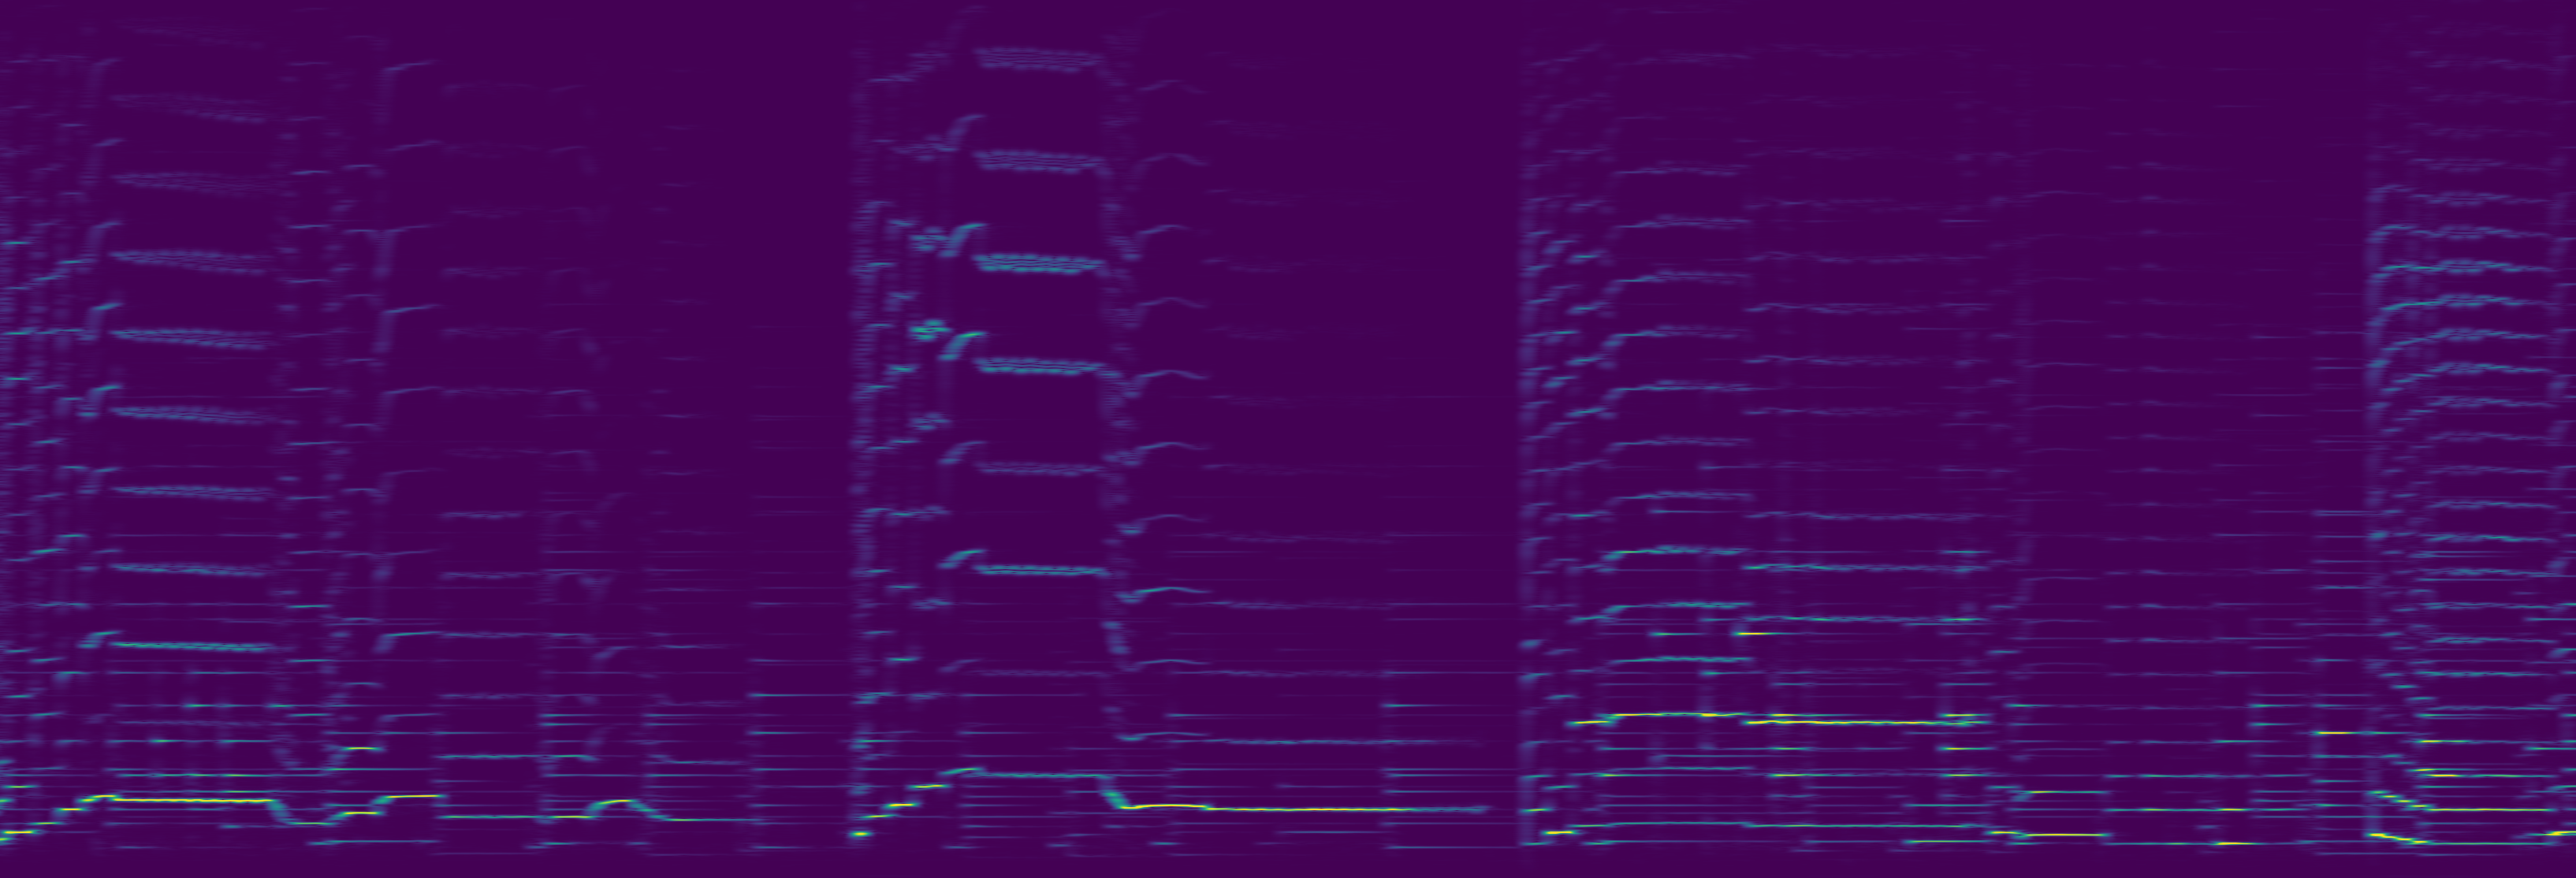

In [25]:
display(savePath);
DisplayImage(savePath);

#### Mel Spectrogram

*Skipping plotting of Mel-Spectrogram as Spectrogram.Net's MelSpectrogram API doesn't work with .Net Interactive.*

In [26]:
string melSavePath = $"{Path.GetFileNameWithoutExtension(SampleAudioFilePath)}-melspectro.png";
PlotMelSpectrogram(sampleRate, audio, melSavePath);

File saved at jazz.00002-melspectro.png

jazz.00002-melspectro.png


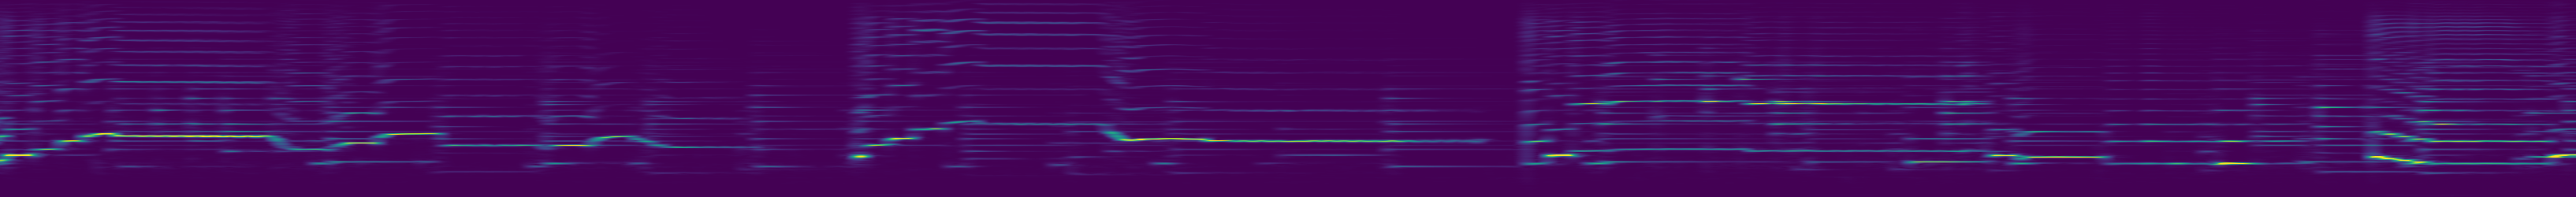

In [27]:
display(melSavePath);
DisplayImage(melSavePath);

## Machine learning

The GTZAN dataset has both audio and corresponding melspectrogram image of a file. 
For training and evaluation, we'll use the images and for prediction we'll use audio file.
Its more of Image classification problem now.
In case of audio files, we need to first generate melspectrogram and train it.

### Image Classification

We'll be working on MelSpectrogram images of audio files. Its present under 'images_original' folder. A pre-trained CNN architecture is used to classify the images as per Genre.

#### Prepare Dataset

In [28]:
display(Directory.GetCurrentDirectory());
display(AudioImagesFilePathAll);

C:\Praveen\sourcecontrol\github\praveenraghuvanshi\tech-sessions\11052024-Sound-Classification-ML.Net-dotnetblr

C:\Praveen\sourcecontrol\github\praveenraghuvanshi\tech-sessions\11052024-Sound-Classification-ML.Net-dotnetblr\gtzan-dataset-music-genre-classification\Data\images_original_all

In [29]:
CopyAllAudioImagesToADirectory();

False

C:\Praveen\sourcecontrol\github\praveenraghuvanshi\tech-sessions\11052024-Sound-Classification-ML.Net-dotnetblr\gtzan-dataset-music-genre-classification\Data\images_original_all

### Load Dataset

#### Data Classes

In [30]:
public struct ImageSettings
{
    public const int Height = 288;
    public const int Width = 432;
}

In [31]:
public class ImageData
{
    public string ImagePath { get; set; }

    public string Label { get; set; }
}

In [32]:
public class ModelInput
{
    public byte[] Image { get; set; }
    
    public UInt32 LabelAsKey { get; set; }

    public string ImagePath { get; set; }

    public string Label { get; set; }
}

In [33]:
public class ModelOutput
{
    public string ImagePath { get; set; }

    public string Label { get; set; }

    public string PredictedLabel { get; set; }
}

In [34]:
public void DisplayOutcome(ModelOutput prediction)
{
    display("************ Classification Outcome *************");
    display($"File             : {Path.GetFileName(prediction.ImagePath)}");
    display($"Expected Genre   : {prediction.Label}");
    display($"Predicted Genre: : {prediction.PredictedLabel}");
    display("*************************************************");
}

#### Load Images from Directory

In [35]:
public static IEnumerable<ImageData> LoadImagesFromDirectory(string folder, bool useFolderNameAsLabel = true)
{
    var files = Directory.GetFiles(folder, "*",
        searchOption: SearchOption.AllDirectories);

    foreach (var file in files)
    {
        if ((Path.GetExtension(file) != ".jpg") && (Path.GetExtension(file) != ".png"))
            continue;

        var label = Path.GetFileName(file);

        if (useFolderNameAsLabel)
            label = Directory.GetParent(file).Name;
        else
        {
            for (int index = 0; index < label.Length; index++)
            {
                if (!char.IsLetter(label[index]))
                {
                    label = label.Substring(0, index);
                    break;
                }
            }
        }

        yield return new ImageData()
        {
            ImagePath = file,
            Label = label
        };
    }
}

In [37]:
var images = LoadImagesFromDirectory(AudioImagesFilePath).Take(500);
display(images.Count());

500

#### Build ML Pipeline

In [38]:
var mlContext = new MLContext(seed: 1);
var dataView = mlContext.Data.LoadFromEnumerable(images);
dataView = mlContext.Data.ShuffleRows(dataView);

In [39]:
var imagesDataset = mlContext.Transforms.Conversion.MapValueToKey(outputColumnName: "LabelAsKey",
                                        inputColumnName: "Label",
                                        keyOrdinality: ValueToKeyMappingEstimator.KeyOrdinality.ByValue)
                                        .Append(mlContext.Transforms.LoadRawImageBytes(outputColumnName: "Image",
                                                                    imageFolder: AudioImagesFilePathAll,
                                                                    inputColumnName: "ImagePath"))
                                        .Fit(dataView)
                                        .Transform(dataView);


warning CS1701: Assuming assembly reference 'Microsoft.AspNetCore.Html.Abstractions, Version=2.2.0.0, Culture=neutral, PublicKeyToken=adb9793829ddae60' used by 'Microsoft.DotNet.Interactive.Formatting' matches identity 'Microsoft.AspNetCore.Html.Abstractions, Version=6.0.0.0, Culture=neutral, PublicKeyToken=adb9793829ddae60' of 'Microsoft.AspNetCore.Html.Abstractions', you may need to supply runtime policy



##### Split Dataset : Train/Test - 70:30

In [40]:
var trainTestSplit = mlContext.Data.TrainTestSplit(imagesDataset, 0.3);

var testSet = trainTestSplit.TestSet;
var trainSet = trainTestSplit.TrainSet;

In [41]:
display(mlContext.Data.CreateEnumerable<ModelInput>(testSet,reuseRowObject:true).Count());
display(mlContext.Data.CreateEnumerable<ModelInput>(trainSet,reuseRowObject:true).Count());

146

354

#### Define Architecture and Hyperparamters

- Architecture  : ResnetV250
- BatchSize     : 10
- Learning Rate : 0.01f

<img src="assets\resnet.png" alt="Spectrogram" style="zoom:80%;" />

In [42]:
var options = new ImageClassificationTrainer.Options()
{
    FeatureColumnName = "Image",
    LabelColumnName = "LabelAsKey",
    Arch = ImageClassificationTrainer.Architecture.ResnetV250,
    Epoch = 2,
    BatchSize = 10,
    LearningRate = 0.01f,
    MetricsCallback = (metrics) => Console.WriteLine(metrics),
    ValidationSet = testSet
};

var trainingPipeline = mlContext.MulticlassClassification.Trainers.ImageClassification(options)
        .Append(mlContext.Transforms.Conversion.MapKeyToValue(
            outputColumnName: "PredictedLabel",
            inputColumnName: "PredictedLabel"));


warning CS1701: Assuming assembly reference 'Microsoft.AspNetCore.Html.Abstractions, Version=2.2.0.0, Culture=neutral, PublicKeyToken=adb9793829ddae60' used by 'Microsoft.DotNet.Interactive.Formatting' matches identity 'Microsoft.AspNetCore.Html.Abstractions, Version=6.0.0.0, Culture=neutral, PublicKeyToken=adb9793829ddae60' of 'Microsoft.AspNetCore.Html.Abstractions', you may need to supply runtime policy



### Train Model

In [43]:
ITransformer model = trainingPipeline.Fit(trainSet);

Saver not created because there are no variables in the graph to restore
Phase: Bottleneck Computation, Dataset used:      Train, Image Index:   1
Phase: Bottleneck Computation, Dataset used:      Train, Image Index:   2
Phase: Bottleneck Computation, Dataset used:      Train, Image Index:   3
Phase: Bottleneck Computation, Dataset used:      Train, Image Index:   4
Phase: Bottleneck Computation, Dataset used:      Train, Image Index:   5
Phase: Bottleneck Computation, Dataset used:      Train, Image Index:   6
Phase: Bottleneck Computation, Dataset used:      Train, Image Index:   7
Phase: Bottleneck Computation, Dataset used:      Train, Image Index:   8
Phase: Bottleneck Computation, Dataset used:      Train, Image Index:   9
Phase: Bottleneck Computation, Dataset used:      Train, Image Index:  10
Phase: Bottleneck Computation, Dataset used:      Train, Image Index:  11
Phase: Bottleneck Computation, Dataset used:      Train, Image Index:  12
Phase: Bottleneck Computation, Dataset 

Phase: Bottleneck Computation, Dataset used:      Train, Image Index: 111
Phase: Bottleneck Computation, Dataset used:      Train, Image Index: 112
Phase: Bottleneck Computation, Dataset used:      Train, Image Index: 113
Phase: Bottleneck Computation, Dataset used:      Train, Image Index: 114
Phase: Bottleneck Computation, Dataset used:      Train, Image Index: 115
Phase: Bottleneck Computation, Dataset used:      Train, Image Index: 116
Phase: Bottleneck Computation, Dataset used:      Train, Image Index: 117
Phase: Bottleneck Computation, Dataset used:      Train, Image Index: 118
Phase: Bottleneck Computation, Dataset used:      Train, Image Index: 119
Phase: Bottleneck Computation, Dataset used:      Train, Image Index: 120
Phase: Bottleneck Computation, Dataset used:      Train, Image Index: 121
Phase: Bottleneck Computation, Dataset used:      Train, Image Index: 122
Phase: Bottleneck Computation, Dataset used:      Train, Image Index: 123
Phase: Bottleneck Computation, Dataset

Phase: Bottleneck Computation, Dataset used:      Train, Image Index: 222
Phase: Bottleneck Computation, Dataset used:      Train, Image Index: 223
Phase: Bottleneck Computation, Dataset used:      Train, Image Index: 224
Phase: Bottleneck Computation, Dataset used:      Train, Image Index: 225
Phase: Bottleneck Computation, Dataset used:      Train, Image Index: 226
Phase: Bottleneck Computation, Dataset used:      Train, Image Index: 227
Phase: Bottleneck Computation, Dataset used:      Train, Image Index: 228
Phase: Bottleneck Computation, Dataset used:      Train, Image Index: 229
Phase: Bottleneck Computation, Dataset used:      Train, Image Index: 230
Phase: Bottleneck Computation, Dataset used:      Train, Image Index: 231
Phase: Bottleneck Computation, Dataset used:      Train, Image Index: 232
Phase: Bottleneck Computation, Dataset used:      Train, Image Index: 233
Phase: Bottleneck Computation, Dataset used:      Train, Image Index: 234
Phase: Bottleneck Computation, Dataset

Phase: Bottleneck Computation, Dataset used:      Train, Image Index: 333
Phase: Bottleneck Computation, Dataset used:      Train, Image Index: 334
Phase: Bottleneck Computation, Dataset used:      Train, Image Index: 335
Phase: Bottleneck Computation, Dataset used:      Train, Image Index: 336
Phase: Bottleneck Computation, Dataset used:      Train, Image Index: 337
Phase: Bottleneck Computation, Dataset used:      Train, Image Index: 338
Phase: Bottleneck Computation, Dataset used:      Train, Image Index: 339
Phase: Bottleneck Computation, Dataset used:      Train, Image Index: 340
Phase: Bottleneck Computation, Dataset used:      Train, Image Index: 341
Phase: Bottleneck Computation, Dataset used:      Train, Image Index: 342
Phase: Bottleneck Computation, Dataset used:      Train, Image Index: 343
Phase: Bottleneck Computation, Dataset used:      Train, Image Index: 344
Phase: Bottleneck Computation, Dataset used:      Train, Image Index: 345
Phase: Bottleneck Computation, Dataset

Phase: Bottleneck Computation, Dataset used: Validation, Image Index:  90
Phase: Bottleneck Computation, Dataset used: Validation, Image Index:  91
Phase: Bottleneck Computation, Dataset used: Validation, Image Index:  92
Phase: Bottleneck Computation, Dataset used: Validation, Image Index:  93
Phase: Bottleneck Computation, Dataset used: Validation, Image Index:  94
Phase: Bottleneck Computation, Dataset used: Validation, Image Index:  95
Phase: Bottleneck Computation, Dataset used: Validation, Image Index:  96
Phase: Bottleneck Computation, Dataset used: Validation, Image Index:  97
Phase: Bottleneck Computation, Dataset used: Validation, Image Index:  98
Phase: Bottleneck Computation, Dataset used: Validation, Image Index:  99
Phase: Bottleneck Computation, Dataset used: Validation, Image Index: 100
Phase: Bottleneck Computation, Dataset used: Validation, Image Index: 101
Phase: Bottleneck Computation, Dataset used: Validation, Image Index: 102
Phase: Bottleneck Computation, Dataset

### Evaluate Model

In [ ]:
var predicitions = model.Transform(testSet);
var metrics = mlContext.MulticlassClassification.Evaluate(predicitions, labelColumnName: "LabelAsKey", predictedLabelColumnName: "PredictedLabel");
display(metrics);

### Prediction

In [44]:
var testInputs = mlContext.Data.CreateEnumerable<ModelInput>(testSet,reuseRowObject:true);
display(testInputs.Count());

146

In [45]:
var predictionEngine = mlContext.Model.CreatePredictionEngine<ModelInput, ModelOutput>(model);
ModelInput image = testInputs.ElementAt(5);

var prediction = predictionEngine.Predict(image);

#### Sample-1

In [46]:
DisplayOutcome(prediction);

************ Classification Outcome *************

File             : country00024.png

Expected Genre   : country

Predicted Genre: : country

*************************************************

#### Sample-2

In [47]:
ModelInput image = testInputs.ElementAt(6);

var prediction = predictionEngine.Predict(image);

In [48]:
DisplayOutcome(prediction);

************ Classification Outcome *************

File             : blues00013.png

Expected Genre   : blues

Predicted Genre: : disco

*************************************************

### Save Model

In [49]:
mlContext.Model.Save(model, trainSet.Schema, MODEL_FILE_NAME);

In [ ]:
display(ModelPath);

In [ ]:
// Model File size
FileInfo fi = new FileInfo(MODEL_FILE_NAME);
display($"Model File size: {fi.Length / (1024 * 1024)} MB");

## References
- [Spectrogram](https://github.com/swharden/Spectrogram/)
- [NAudio](https://github.com/naudio/NAudio)
- [ML.Net](https://github.com/dotnet/machinelearning)
- [VoiceNET Library](https://github.com/nhannt201/VoiceNET.Library)
- [Spectrogram Visualizer](https://musiclab.chromeexperiments.com/spectrogram)
- [Tips and tricks for C# Jupyter notebook](https://ewinnington.github.io/posts/jupyter-tips-csharp)
- [Audio analytics with Azure Automated ML](https://www.youtube.com/watch?v=iHL9RmOejdo&t=5s)